setup

In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline
%load_ext autoreload
%autoreload 2

First set of results

- 3x3 grid size
- 100 simulations 
- methods:
    1. exact
    2. LBP [Kmax=1,Kmax=10]
    3. VI [Kmax=1,Kmax=10]

Text(0.5,1,'3x3 Forest || 100 Simulations')

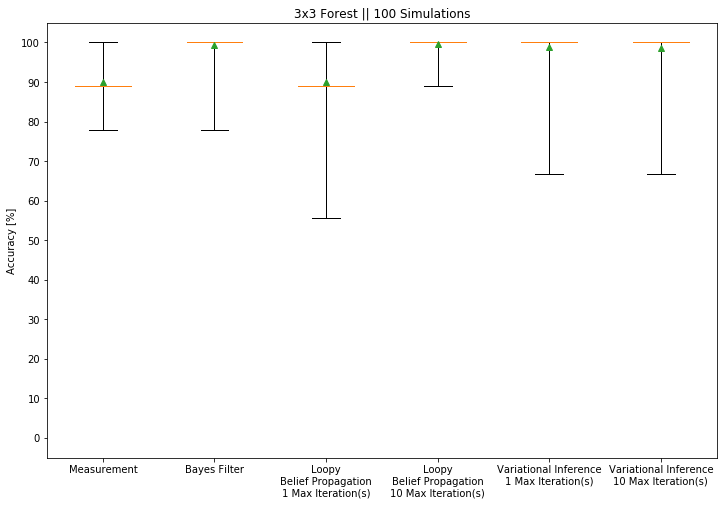

In [214]:
plot_data = []
tick_labels = []

# import and add measurement stats from a file
file = 'ex_gs3_s100.pkl'
# file = 'mp_gs3_K10_CNone_s100.pkl'

pkl_file = open('data files/'+file, 'rb')
data = pickle.load(pkl_file)
pkl_file.close()

grid_size = data['grid_size']
meas_accuracy = []
for s in data.keys():
    if isinstance(s, int):
        errors = data[s]['meas_error']
        accuracies_pct = [(grid_size**2 - e)*100/grid_size**2 for e in errors]
        meas_accuracy.append(np.median(accuracies_pct))

plot_data.append(meas_accuracy)
tick_labels.append('Measurement')

# import and add results from exact algorithm
file_list = ['ex_gs3_s100.pkl']
for file in file_list:
    pkl_file = open('data files/'+file, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    
    grid_size = data['grid_size']
    state_accuracy = []
    for s in data.keys():
        if isinstance(s, int):
            errors = data[s]['state_error']
            accuracies_pct = [(grid_size**2 - e)*100/grid_size**2 for e in errors]
            state_accuracy.append(np.median(accuracies_pct))
            
    plot_data.append(state_accuracy)
    # tick_labels.append('ex_'+'gs'+str(grid_size))
    tick_labels.append('Bayes Filter')

# import and add results from LBP algorithm
file_list = ['lbp_wh9_i1_h3_s100.pkl', 'lbp_wh9_i10_h3_s100.pkl']
for file in file_list:
    pkl_file = open('data files/'+file, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    
    num_nodes = data['width']*data['height']
    maxIterations = data['maxIterations']
    state_accuracy = []
    for s in data.keys():
        if isinstance(s, int):
            errors = data[s]['robotE']
            accuracies_pct = [(num_nodes - e)*100/num_nodes for e in errors]
            state_accuracy.append(np.median(accuracies_pct))
            
    plot_data.append(state_accuracy)
    # tick_labels.append('lbp_'+'wh'+str(num_nodes)+'_i'+str(maxIterations))
    tick_labels.append('Loopy\nBelief Propagation\n%d Max Iteration(s)' %maxIterations)
    
# import and add results from VI algorithm
file_list = ['mp_gs3_K1_CNone_s100.pkl', 'mp_gs3_K10_CNone_s100.pkl']
for file in file_list:
    pkl_file = open('data files/'+file, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    
    grid_size = data['grid_size']
    Kparam = data['Kparam']
    state_accuracy = []
    for s in data.keys():
        if isinstance(s, int):
            errors = data[s]['state_error']
            accuracies_pct = [(grid_size**2 - e)*100/grid_size**2 for e in errors]
            state_accuracy.append(np.median(accuracies_pct))
            
    plot_data.append(state_accuracy)
    # tick_labels.append('mp_'+'gs'+str(grid_size)+'_k'+str(Kparam))
    tick_labels.append('Variational Inference\n%d Max Iteration(s)' %Kparam)

# plot results
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
boxplot_ax = ax.boxplot(plot_data, whis='range', showmeans=True)
_ = ax.set_xticklabels(tick_labels)
ax.set_ylim([-5,105])
ax.set_yticks(np.arange(0, 110, 10.0))
ax.set_ylabel('Accuracy [%]')
ax.set_title('3x3 Forest || 100 Simulations')

Second set of results
- 10x10 grid size
- 100 simulations
- methods:
    1. LBP [Kmax=1,Kmax=10]
    2. VI [Kmax=1,Kmax=10]

Text(0.5,1,'10x10 Forest || 100 Simulations')

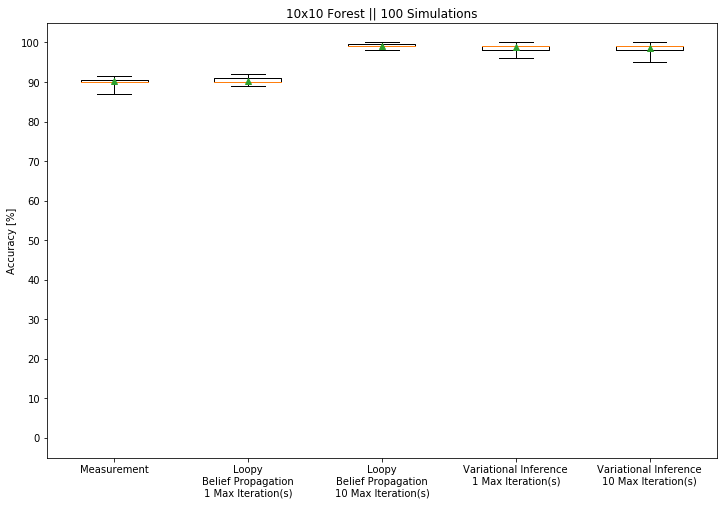

In [215]:
plot_data = []
tick_labels = []

# load measurement stats from a file
file = 'mp_gs10_K10_CNone_s100.pkl'
pkl_file = open('data files/'+file, 'rb')
data = pickle.load(pkl_file)
pkl_file.close()

grid_size = data['grid_size']
meas_accuracy = []
for s in data.keys():
    if isinstance(s, int):
        errors = data[s]['meas_error']
        accuracies_pct = [(grid_size**2 - e)*100/grid_size**2 for e in errors]
        meas_accuracy.append(np.median(accuracies_pct))
        
plot_data.append(meas_accuracy)
tick_labels.append('Measurement')

# import and add results from LBP algorithm
file_list = ['lbp_wh100_i1_h3_s100.pkl', 'lbp_wh100_i10_h3_s100.pkl']
for file in file_list:
    pkl_file = open('data files/'+file, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    
    num_nodes = data['width']*data['height']
    maxIterations = data['maxIterations']
    state_accuracy = []
    for s in data.keys():
        if isinstance(s, int):
            errors = data[s]['robotE']
            accuracies_pct = [(num_nodes - e)*100/num_nodes for e in errors]
            state_accuracy.append(np.median(accuracies_pct))
            
    plot_data.append(state_accuracy)
    tick_labels.append('Loopy\nBelief Propagation\n%d Max Iteration(s)' %maxIterations)

# import and add results from VI algorithm
file_list = ['mp_gs10_K1_CNone_s100.pkl', 'mp_gs10_K10_CNone_s100.pkl']
for file in file_list:
    pkl_file = open('data files/'+file, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    
    grid_size = data['grid_size']
    Kparam = data['Kparam']

    state_accuracy = []
    for s in data.keys():
        if isinstance(s, int):
            errors = data[s]['state_error']
            accuracies_pct = [(grid_size**2 - e)*100/grid_size**2 for e in errors]
            state_accuracy.append(np.median(accuracies_pct))
            
    plot_data.append(state_accuracy)
    tick_labels.append('Variational Inference\n%d Max Iteration(s)' %Kparam)
    # tick_labels.append('mp_'+'gs'+str(grid_size)+'_k'+str(Kparam))
    
# plot results
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
boxplot_ax = ax.boxplot(plot_data, whis='range', showmeans=True)
_ = ax.set_xticklabels(tick_labels)
ax.set_ylim([-5,105])
ax.set_yticks(np.arange(0, 110, 10.0))
ax.set_ylabel('Accuracy [%]')
ax.set_title('10x10 Forest || 100 Simulations')

In [ ]:
plot_data = []
tick_labels = []
#for file in os.listdir('data files'):
#    if file.startswith('mp'):

file_list = ['mp_gs10_K1_CNone_s100.pkl','mp_gs10_K3_CNone_s100.pkl','mp_gs10_K5_CNone_s100.pkl',
              'lbp_wh100_s1.pkl']
grid_size = 10

# file_list = ['mp_gs25_K1_CNone_s10.pkl','mp_gs25_K5_CNone_s10.pkl']

# file_list = ['lbp_wh4_s100.pkl']
# grid_size = 2

for file in file_list:
    pkl_file = open('data files/'+file, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()

    if not plot_data:
        meas_data = [np.median(data[s]['meas_error'])*100/grid_size**2 for s in data.keys()]
        plot_data.append(meas_data)
        tick_labels.append('Measurement')

        print('measurement')
        print('min:',np.amin(meas_data))
        print('Q1,Q3:',np.percentile(meas_data,[25,75]))
        print('median:',np.median(meas_data))
        print('max:',np.amax(meas_data))
        print()

    try:
        state_data = [np.median(data[s]['state_error'])*100/grid_size**2 for s in data.keys()]
    except:
        pass
    try:
        state_data = [np.median(data[s]['robotE'])*100/grid_size**2 for s in data.keys()]
        print(state_data)
    except:
        pass
    plot_data.append(state_data)
    tick_labels.append(file)
    
    print(file)
    print('min:',np.amin(state_data))
    print('Q1,Q3:',np.percentile(state_data,[25,75]))
    print('median:',np.median(state_data))
    print('max:',np.amax(state_data))
    print()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
boxplot_ax = ax.boxplot(plot_data)
_ = ax.set_xticklabels(tick_labels)